In [0]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten, Input
from tensorflow.keras.layers import Dropout, BatchNormalization
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import Adam 
import matplotlib.pyplot as plt
from keras.utils import np_utils
from tensorflow.keras.callbacks import EarlyStopping



In [0]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [0]:
x_train = x_train.astype('float32')
x_test =x_test.astype('float32')
x_train /= 255
x_test /= 255
number_of_classes = 10
y_train = np_utils.to_categorical(y_train, number_of_classes)
y_test = np_utils.to_categorical(y_test, number_of_classes)


In [0]:
inputs = Input(shape=(32, 32, 3))
x = BatchNormalization()(inputs)
x = Conv2D(32, (3, 3), padding='same', activation='relu')(x)
x = BatchNormalization()(x)
x = Conv2D(32, (3, 3), padding='same', activation='relu')(x)
x = Dropout(0.25)(x)
x = BatchNormalization()(x)
x = Conv2D(32, (3, 3), padding='same', activation='relu')(x)
x = Dropout(0.25)(x)
x = BatchNormalization()(x)
x = Conv2D(32, (3, 3), padding='same', activation='relu')(x)
x = Dropout(0.25)(x)
x = Conv2D(32, (3, 3), padding='same', activation='relu')(x)
x = MaxPooling2D(pool_size=(2, 2))(x)
x = Dropout(0.25)(x)
x = BatchNormalization()(x)
x = Conv2D(64, (3, 3), padding='same', activation='relu')(x)
x = Dropout(0.25)(x)
x = Conv2D(64, (3, 3), activation='relu')(x)
x = MaxPooling2D(pool_size=(2, 2))(x)
x = Dropout(0.25)(x)
x = Flatten()(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
outputs = Dense(10, activation='softmax')(x)
model = Model(inputs, outputs)


In [21]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 32, 32, 3)         0         
_________________________________________________________________
batch_normalization_5 (Batch (None, 32, 32, 3)         12        
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization_6 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
dropout_7 (Dropout)          (None, 32, 32, 32)        0         
_________________________________________________________________
batch_normalization_7 (Batch (None, 32, 32, 32)        128       
__________

In [0]:
 adam = Adam(lr=0.0005)  

In [0]:
 model.compile(optimizer=adam,
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [0]:
earlystopping = EarlyStopping(monitor='val_acc', patience=3)

In [25]:
model.fit(x_train, y_train, validation_split=0.1,
              shuffle=True, batch_size=32,
          epochs=50, callbacks=[earlystopping])





Train on 45000 samples, validate on 5000 samples
Epoch 1/50
45000/45000 [==============================] - 50s 1ms/step - loss: 1.6246 - acc: 0.4052 - val_loss: 1.3916 - val_acc: 0.5100
Epoch 2/50
45000/45000 [==============================] - 41s 921us/step - loss: 1.2765 - acc: 0.5397 - val_loss: 1.1198 - val_acc: 0.6012
Epoch 3/50
45000/45000 [==============================] - 56s 1ms/step - loss: 1.1051 - acc: 0.6063 - val_loss: 1.0063 - val_acc: 0.6456
Epoch 4/50
45000/45000 [==============================] - 57s 1ms/step - loss: 0.9758 - acc: 0.6548 - val_loss: 0.9216 - val_acc: 0.6798
Epoch 5/50
45000/45000 [==============================] - 57s 1ms/step - loss: 0.8952 - acc: 0.6865 - val_loss: 0.7472 - val_acc: 0.7382
Epoch 6/50
45000/45000 [==============================] - 59s 1ms/step - loss: 0.8192 - acc: 0.7114 - val_loss: 0.7683 - val_acc: 0.7340
Epoch 7/50
45000/45000 [==============================] - 48s 1ms/step - loss: 0.7670 - acc: 0.7288 - val_loss: 0.6979 - val_ac

In [26]:
model.evaluate(x_test, y_test, verbose=2)

[0.5969805984735489, 0.8031]

In [0]:
classes = {"0":"Plane", "1":"Car", "2":"Bird", "3":"Cat", "4":"Deer", "5":"Dog", "6" :"Frog", "7" :"Horse", "8" :"Ship", "9" :"Truck"}

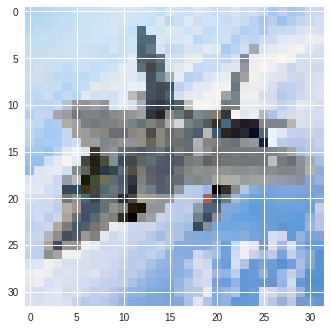

In [28]:
img_path = "military-raptor-582888_640.jpg"
img = image.load_img(img_path, target_size=(32,32))
plt.imshow(img)
plt.show()

In [0]:
x = image.img_to_array(img)
x /= 255
x = np.expand_dims(x, axis=0)

In [30]:
prediction = model.predict(x)
print(prediction)

[[6.8018216e-01 6.0019954e-07 4.3364539e-04 2.9106165e-04 2.9825357e-01
  1.5069221e-05 1.3491109e-05 4.5233281e-04 2.0347679e-02 1.0532329e-05]]


In [31]:
pr = np.argmax(prediction) 
for k,v in classes.items(): 
     if k == str(pr):
         print("It's a", v)

It's a Plane


In [33]:
img_path2 = "car-49278_640.jpg"
img2 = image.load_img(img_path2, target_size=(32,32))
x = image.img_to_array(img2)
x /= 255
x = np.expand_dims(x, axis=0)
prediction = model.predict(x)
pr = np.argmax(prediction)
for k,v in classes.items(): 
     if k == str(pr):
         print("It's a", v)

It's a Car


In [34]:
img_path3 = "horses-back-587609_640.jpg"
img3 = image.load_img(img_path3, target_size=(32,32))
x = image.img_to_array(img3)
x /= 255
x = np.expand_dims(x, axis=0)
prediction = model.predict(x)
pr = np.argmax(prediction)
for k,v in classes.items(): 
     if k == str(pr):
         print("It's a", v)

It's a Frog
